In [4]:
import matplotlib.pyplot as plt
import numpy as np

## Полиномиальная регрессия

In [59]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-1 / 2 * x)

In [73]:
def compute_polynomial_coeffs(x, y):
    n = len(x)
    b = y
    A = np.ones((n, n))
    for i in range(1, n):
        A[:, i] = x ** i
    return np.linalg.solve(A, b)

In [74]:
def polynome(w, x):
    res = 0
    for i in range(len(w)):
        res += w[i] * x ** i
    return res

n = 5

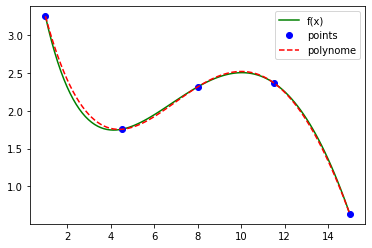

In [82]:
x = np.linspace(1, 15, 100)
plt.plot(x, f(x), label = 'f(x)', color = 'green')

n = 5
x_points = np.linspace(1, 15, n)
y_points = f(x_points)
plt.plot(x_points, y_points, 'o', label = 'points', color = 'blue')

w = compute_polynomial_coeffs(x_points, y_points)
plt.plot(x, polynome(w, x), '--', label = 'polynome', color = 'red')

plt.legend()

n = 15

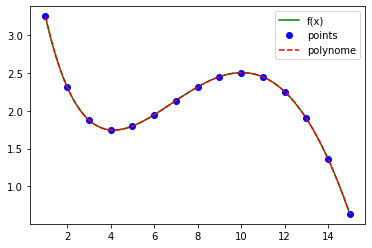

In [83]:
x = np.linspace(1, 15, 100)
plt.plot(x, f(x), label = 'f(x)', color = 'green')

n = 15
x_points = np.linspace(1, 15, n)
y_points = f(x_points)
plt.plot(x_points, y_points, 'o', label = 'points', color = 'blue')

w = compute_polynomial_coeffs(x_points, y_points)
plt.plot(x, polynome(w, x), '--', label = 'polynome', color = 'red')

plt.legend()

Полином достаточно хорошо приближает функцию, при этом с ростом числа точек (степени полинома) приближение начинает практически соответствовать исходной функции. При n = 5 приближение местами отличается от исходной функции. При n = 15 приближение уже полностью соответствует исходной функции.

## Полиномиальная регрессия с зашумленными данными

n = 5

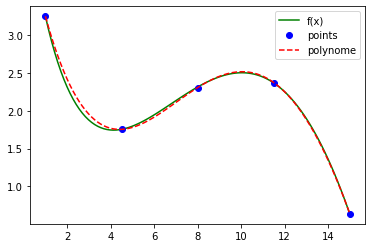

In [84]:
x = np.linspace(1, 15, 100)
plt.plot(x, f(x), label = 'f(x)', color = 'green')

n = 5
noise = 0.01
x_points = np.linspace(1, 15, n)
y_points = f(x_points) + np.random.randn(n) * noise
plt.plot(x_points, y_points, 'o', label = 'points', color = 'blue')

w = compute_polynomial_coeffs(x_points, y_points)
plt.plot(x, polynome(w, x), '--', label = 'polynome', color = 'red')

plt.legend()

n = 15

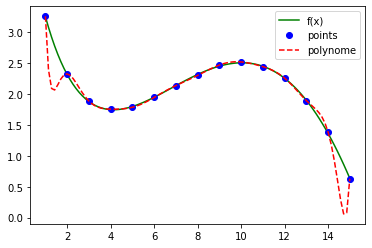

In [86]:
x = np.linspace(1, 15, 100)
plt.plot(x, f(x), label = 'f(x)', color = 'green')

n = 15
noise = 0.01
x_points = np.linspace(1, 15, n)
y_points = f(x_points) + np.random.randn(n) * noise
plt.plot(x_points, y_points, 'o', label = 'points', color = 'blue')

w = compute_polynomial_coeffs(x_points, y_points)
plt.plot(x, polynome(w, x), '--', label = 'polynome', color = 'red')

plt.legend()

В данном случае аппроксимация стала хуже. При n = 5 приближение имеет приблизительно такую же точность, как и при отсутствии шумов. При n = 15 приближение становится значительно хуже. Точки, в которых считались значения полинома, соответсвуют точкам исходной функции, но в промежутках между некоторыми из них происходит сильное отклонение от исходных значений.

## Метод наименьших квадратов

In [100]:
def mnk(x, y, n):
    N = len(x)
    b = y
    A = np.ones((N, n))
    for i in range(1, n):
        A[:, i] = x ** i
    T = np.linalg.inv(np.transpose(A) @ A) @ np.transpose(A)
    return T @ b

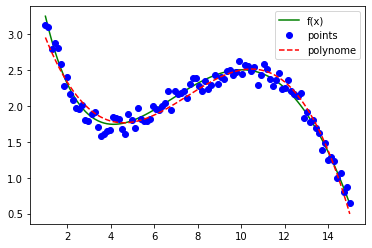

In [108]:
x = np.linspace(1, 15, 100)
plt.plot(x, f(x), label = 'f(x)', color = 'green')

N = 100
n = 4
noise = 0.1
x_points = np.linspace(1, 15, N)
y_points = f(x_points) + np.random.randn(N) * noise
plt.plot(x_points, y_points, 'o', label = 'points', color = 'blue')

w = mnk(x_points, y_points, n)
plt.plot(x, polynome(w, x_points), '--', label = 'polynome', color = 'red')

plt.legend()

Полиномиальная регрессия хорошо аппроксимирует исходные данные, но может эффективно использоваться только при значительно небольшом количестве рассматриваемых точек и в отсутствии даже малых шумов. Метод наименьших квадратов позволяет аппроксимировать данные с достаточно близкой точностью, строить полиномы с большим числом точек и малых значением степеней, при этом даже с шумом аппроксимация будет близка к точным данным.